# PART 1: Data Collection of Cars and Motorcycles Subreddits 

In [1]:
#Importing libraries
import requests
import pandas as pd
import time
import datetime as dt

In [2]:
s_type='submission'
url= f'https://api.pushshift.io/reddit/search/{s_type}'

In [3]:
# for car reddit

# parameters dictionary
params = {
    'subreddit': 'cars',
    'size': 500,
    'before': 1626811825
}
res=requests.get(url,params)
assert res.status_code==200       # to check if our request is successfull
post_list=res.json()['data']      # collect only post_data

In [4]:
res.status_code

200

In [5]:
len(post_list)

100

In [6]:
full_df=pd.DataFrame(post_list)[['title','subreddit','created_utc']]

In [7]:
full_df.to_csv('cars_posts.csv')

In [8]:
# function to pushshift 5000 posts
unix_time_stamp=1626811825
def pushshift_query(full_df_path,subreddit,s_type,iters=50):
    for pull in range(iters):
        full_df=pd.read_csv(full_df_path)
        url=f'https://api.pushshift.io/reddit/search/{s_type}/?subreddit={subreddit}&before={full_df["created_utc"].min()}&size=100'
        
        res=requests.get(url)
        if res.status_code==200:
            post_list=res.json()['data']
            temp_df=pd.DataFrame(post_list)[['title','subreddit','created_utc']]
            full_df=pd.concat([full_df,temp_df])
            print(full_df.shape)
            print(full_df['title'].nunique())
            print('waiting until next pull....')
            
            time.sleep(8)
        else:
            continue
        full_df.to_csv(full_df_path,index=False)

In [9]:
pushshift_query(full_df_path='cars_posts.csv',subreddit='cars',s_type='submission')

(200, 4)
194
waiting until next pull....
(300, 4)
294
waiting until next pull....
(400, 4)
391
waiting until next pull....
(500, 4)
489
waiting until next pull....
(600, 4)
586
waiting until next pull....
(700, 4)
683
waiting until next pull....
(800, 4)
782
waiting until next pull....
(900, 4)
881
waiting until next pull....
(1000, 4)
979
waiting until next pull....
(1100, 4)
1079
waiting until next pull....
(1200, 4)
1178
waiting until next pull....
(1300, 4)
1276
waiting until next pull....
(1400, 4)
1373
waiting until next pull....
(1500, 4)
1469
waiting until next pull....
(1600, 4)
1568
waiting until next pull....
(1700, 4)
1663
waiting until next pull....
(1800, 4)
1755
waiting until next pull....
(1900, 4)
1851
waiting until next pull....
(2000, 4)
1949
waiting until next pull....
(2100, 4)
2045
waiting until next pull....
(2200, 4)
2139
waiting until next pull....
(2300, 4)
2236
waiting until next pull....
(2400, 4)
2332
waiting until next pull....
(2500, 4)
2428
waiting until

In [10]:
# for motorcycles reddit
params2 = {
    'subreddit': 'motorcycles',
    'size': 500,
    'before': 1626811825
}
res2=requests.get(url,params2)
assert res2.status_code==200
post_list2 = res2.json()['data']

In [11]:
#converting data to DataFrame 
full_df2 = pd.DataFrame(post_list2)[['title','subreddit','created_utc']]

In [12]:
#saving data to csv file
full_df2.to_csv('motorcycles_posts.csv')

In [13]:
pushshift_query(full_df_path='motorcycles_posts.csv',subreddit='motorcycles',s_type='submission')

(200, 4)
198
waiting until next pull....
(300, 4)
295
waiting until next pull....
(400, 4)
392
waiting until next pull....
(500, 4)
488
waiting until next pull....
(600, 4)
586
waiting until next pull....
(700, 4)
685
waiting until next pull....
(800, 4)
780
waiting until next pull....
(900, 4)
878
waiting until next pull....
(1000, 4)
975
waiting until next pull....
(1100, 4)
1074
waiting until next pull....
(1200, 4)
1171
waiting until next pull....
(1300, 4)
1265
waiting until next pull....
(1400, 4)
1363
waiting until next pull....
(1500, 4)
1463
waiting until next pull....
(1600, 4)
1561
waiting until next pull....
(1700, 4)
1658
waiting until next pull....
(1800, 4)
1756
waiting until next pull....
(1900, 4)
1853
waiting until next pull....
(2000, 4)
1951
waiting until next pull....
(2100, 4)
2049
waiting until next pull....
(2200, 4)
2148
waiting until next pull....
(2300, 4)
2247
waiting until next pull....
(2400, 4)
2344
waiting until next pull....
(2500, 4)
2443
waiting until

# PART 2: Data Preprocessing

In [14]:
import pandas as pd

In [15]:
# loading cars_posts csv file
cars_df = pd.read_csv('cars_posts.csv').drop(columns='Unnamed: 0')
cars_df['target'] = 0
cars_df = cars_df.drop(['subreddit','created_utc'],axis = 1)

In [16]:
cars_df.head()

,title,target
0,Warning lights come on when driving fast,0
1,to buy or not to buy (in la),0
2,"2005 Honda Accord LX, 4 cyl, 154,000 miles. Ba...",0
3,Exterior windshield tint to block UV &amp; IR ...,0
4,Can I fix my leather imitation seats myself?,0


In [17]:
# loading motorcycles_posts csv file
motorcycles_df = pd.read_csv('motorcycles_posts.csv').drop(columns='Unnamed: 0')
motorcycles_df['target'] = 1
motorcycles_df = motorcycles_df.drop(['subreddit','created_utc'],axis = 1)

In [18]:
motorcycles_df.head()

,title,target
0,Recently got my dream bike and made a video ab...,1
1,Cruiser Wrist Discomfort,1
2,I hear a squealing sound when Giving my bike t...,1
3,Are bootleg or flare leg jeans safe on a motor...,1
4,Ruroc Atlas 3.0 Review - The good and the bad,1


In [19]:
# joining both datafraames into one
final_df = pd.concat([cars_df,motorcycles_df])   

In [20]:
final_df.head()

,title,target
0,Warning lights come on when driving fast,0
1,to buy or not to buy (in la),0
2,"2005 Honda Accord LX, 4 cyl, 154,000 miles. Ba...",0
3,Exterior windshield tint to block UV &amp; IR ...,0
4,Can I fix my leather imitation seats myself?,0


In [21]:
final_df.tail()

,title,target
5095,Recommendations on Which Motorcycle to Purchase,1
5096,600cc supersport as a second bike?,1
5097,Am I bogging down my engine? What RPMs should ...,1
5098,September Cross Country Roadtrip,1
5099,Dealer fees seem extreme,1


In [22]:
#final rows are 10,000
final_df.shape

(10100, 2)

In [23]:
# remove rows in case of duplicacy
final_df.drop_duplicates(keep='first', inplace=True)

In [24]:
final_df.shape

(9806, 2)

In [25]:
# to check if there are any rows with null values
final_df.isnull().sum()

title     0
target    0
dtype: int64

# Baseline Score


In [47]:
# Check what we need to check in a classification problem.
final_df['target'].value_counts(normalize=True)

1    0.506221
0    0.493779
Name: target, dtype: float64

In [27]:
#saving data to csv filw with name reddit_posts
final_df.to_csv('reddit_posts.csv')

# PART 3: Modelling

In [28]:
# import libraries that are likely to use in this part
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [29]:
# load reddit_posts csv file
reddit_posts_df = pd.read_csv('reddit_posts.csv').drop(columns='Unnamed: 0')

In [30]:
reddit_posts_df.head()

,title,target
0,Warning lights come on when driving fast,0
1,to buy or not to buy (in la),0
2,"2005 Honda Accord LX, 4 cyl, 154,000 miles. Ba...",0
3,Exterior windshield tint to block UV &amp; IR ...,0
4,Can I fix my leather imitation seats myself?,0


In [50]:
X = reddit_posts_df['title']
y = reddit_posts_df['target']

In [70]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25,
                                                    stratify=y)


# CountVectorize

In [71]:
# Instantiate a CountVectorizer with some arguments
cvec = CountVectorizer(stop_words='english', ngram_range=(1, 2),min_df=.005)

In [72]:
# Fit the vectorizer on our corpus
cvec.fit(X_train)

CountVectorizer(min_df=0.005, ngram_range=(1, 2), stop_words='english')

In [96]:
# Transform the corpus
X_train = cvec.transform(reddit_posts_df['title'])

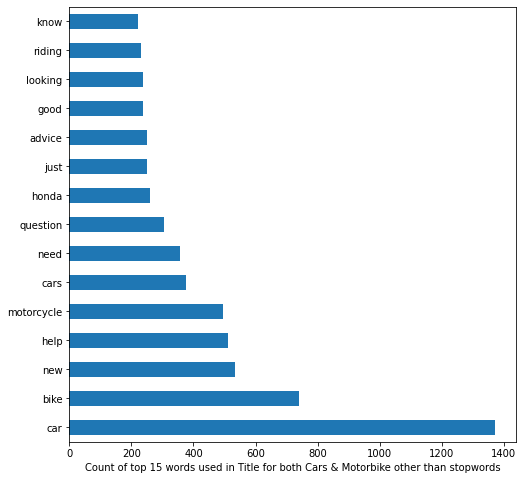

In [97]:
X_train = cvec.transform(reddit_posts_df['title'])
plt.figure(figsize=(8,8))
X_train=pd.DataFrame(X_train.toarray(), columns=cvec.get_feature_names())
X_train.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.xlabel('Count of top 15 words used in Title for both Cars & Motorbike other than stopwords');

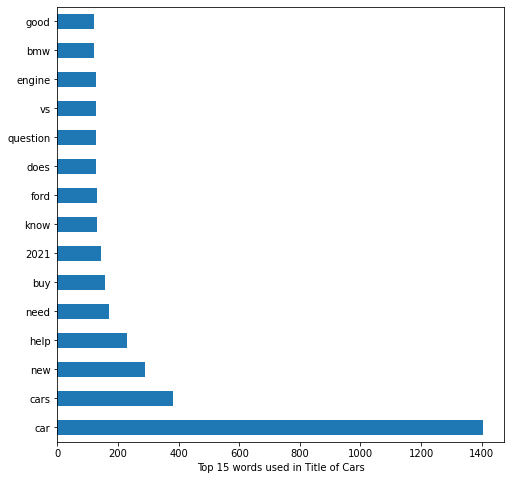

In [106]:
cvec.fit(X_train)
X_train = cvec.transform(cars_df['title'])
plt.figure(figsize=(8,8))
X_train=pd.DataFrame(X_train.toarray(), columns=cvec.get_feature_names())
X_train.sum().sort_values(ascending=False).head(15).plot(kind='barh');
plt.xlabel('Top 15 words used in Title of Cars');

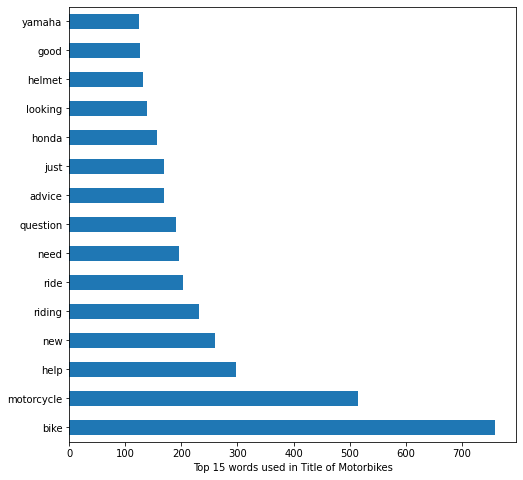

In [107]:
cvec.fit(X_train)
X_train = cvec.transform(motorcycles_df['title'])
plt.figure(figsize=(8,8))
X_train=pd.DataFrame(X_train.toarray(), columns=cvec.get_feature_names())
X_train.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.xlabel('Top 15 words used in Title of Motorbikes');

In [55]:
X_train

<7354x139 sparse matrix of type '<class 'numpy.int64'>'
	with 12712 stored elements in Compressed Sparse Row format>

In [98]:
X_train.shape

(9806, 140)

In [99]:
y_train.shape

(7354,)

In [58]:
# first 10
cvec.get_feature_names()[1:10:1]

['10', '2015', '2016', '2020', '2021', '2022', 'advice', 'air', 'amp']

In [59]:
# Transform test
X_test = cvec.transform(X_test)

In [60]:
y_test.value_counts(normalize=True)

1    0.506117
0    0.493883
Name: target, dtype: float64

## Random Forest Model

In [42]:
def rf_model():
    
    # parameters dictionary
    #ref:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    params = {
            'n_estimators': [10, 25, 30],
            'criterion': ['entropy'],
            'max_depth': [None, 5, 15, 20],
            'bootstrap': [True, False],
            'min_samples_split': [5, 15, 25],
            'max_features': [None, 'log2', 'auto',  .10, .25, .50],
            'warm_start': [True],
            'random_state': [42]
    }
    
    gs = GridSearchCV(RandomForestClassifier(),
                        params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
    
    # fit training data into the model
    gs.fit(X_train, y_train)
     
    print(f'Train score = {gs.score(X_train, y_train)}')
    print(f'Test score = {gs.score(X_test, y_test)}')
    print(f'Best params = {gs.best_params_}')
    
    predictions = gs.predict(X_test)           # predictions for test data
    cm = confusion_matrix(y_test, predictions)
    ConfusionMatrixDisplay(cm).plot();         # plot confusion matrix

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.7min finished


Train score = 0.8260810443296165
Test score = 0.7687601957585645
Best params = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.1, 'min_samples_split': 5, 'n_estimators': 30, 'random_state': 42, 'warm_start': True}


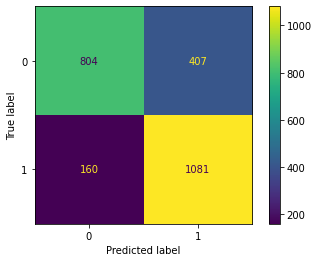

In [43]:
#random forest
rf_model()

## Logistic Regression Model

In [44]:
def lr_model():
    
    # parameters dictionary
    #ref:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    params = {
            'penalty': ['l2'],
            'C': [1,1.5, 2, 2.5,3],
            'class_weight': ['balanced'],
            'warm_start': [True, False],            
            'random_state': [42],
            'solver': ['lbfgs', 'liblinear']
    }
        
    gs = GridSearchCV(LogisticRegression(),
                        params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
    
    # fit training data into the model
    gs.fit(X_train, y_train)
     
    print(f'Train score = {gs.score(X_train, y_train)}')
    print(f'Test score = {gs.score(X_test, y_test)}')
    print(f'Best params = {gs.best_params_}')
    
    pred = gs.predict(X_test)             # predictions for test data
    cm = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cm).plot();    # plot confusion matrix

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


Train score = 0.7827032907261354
Test score = 0.7728384991843393
Best params = {'C': 2, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'warm_start': True}


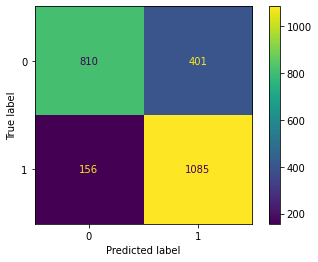

In [45]:
lr_model()

# Conclusion

As we can see both the models gave almost same accuracy for the test data while random forest model gave slightly better accuracy with the training data.

The accuracy of classification is fine but not that good. There can be many reasons behind this but I think the main reason is similarity of subreddits that are cars and motorcycles. Both are vehicle which makes many of their characteristics similar and it is possible that many words can be frequently use in both subreddits which leds to lowering down the accuracy.

 # Recommendations

This code can be used to classify any two subreddits just by changing subreddits name while retrieving data. 

While instantiating a CountVectorize object, we use min_df to ignore rarely occured words otherwise number of columns in input X would be high which increase the performance a bit but this will make our random forest model inefficient in terms of time as it will take about 20 to 30 mins to train. So, if you want a slight better performance you can ignore min_df. 

The performance of models can change based on selection of subreddits, number of posts and our way of processing the data. 